# Kaggle Project: Digit Recognition using Convolutional Neural Networks
The goal of this project is to recognize digits (0-9) using a training set of 42,000 handwritten images from the MNIST dataset.  To achieve this objective, I built a convolutional neural network (CNN) using Keras.

# Acknowledgements
https://www.kaggle.com/kshitijkarnawat/basic-3-layer-neural-network

https://www.kaggle.com/kanncaa1/convolutional-neural-network-cnn-tutorial


# 1) Import libraries and packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import keras
import tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPool2D, Dropout
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.optimizers import RMSprop,Adam

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


# 2) Load datasets

In [2]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
X_train = train.drop("label",axis=1)
y_train = train["label"]
X_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [3]:
# Explore the shape of the training set. There are 42000 observations with 784 features (28x28) and a label
X_train.shape

(42000, 784)

# 3) Exploratory data analysis

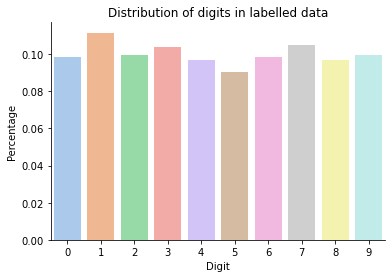

In [4]:
# Plot barchart to visualize distribution of digits in the labelled data
# The distribution of digits is fairly uniform
sns.set_palette("pastel")
ax = sns.barplot(train['label'].value_counts().index, train['label'].value_counts()/len(train))
ax.set_title("Distribution of digits in labelled data")
ax.set_ylabel("Percentage")
ax.set_xlabel("Digit")
sns.despine();

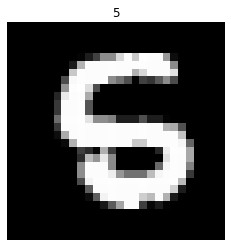

In [5]:
# This function plots the image of a particular value in the training set
def plot_image(id):
    img = X_train.iloc[id].values
    img = img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.title(train.iloc[id,0])
    plt.axis("off")
    plt.show()

# Change the argument of the function to visualize other numbers
plot_image(19)

# 4) Build CNN model using Keras

In [6]:
# We split the data with labels into training set and validation set
# 95% of data in training set, 5% in hold-out validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.05, random_state=2)

In [7]:
# Perform feature normalisation by dividing all values by 255 to get decimal values between 0 and 1
# Activation functions tend to work better with values between 0 and 1
X_train/=255
X_val/=255
X_test/=255

In [8]:
# Reshape the X values. The 784 features attributed to each observation is converted to 28x28x1
X_train=X_train.values.reshape(-1,28,28,1)
X_val=X_val.values.reshape(-1,28,28,1)
X_test=X_test.values.reshape(-1,28,28,1)

In [9]:
#### Build Convolutional Neural Network using Keras
# # Objective of zero padding is to pad the border of the input with zeroes so as not to lose information at the edges of the image
# Batch normalization helps to accelerate the learning process by adjusting and scaling the activations
# Max Pooling helps to reduce the size of the representation, thereby speeding up learning process
# Dropout Regularization helps to reduce overfitting (randomly selected neurons are ignored during training)
model = Sequential()


# Conv --> Batch Norm --> ReLU --> MaxPool --> Dropout 
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 input_shape = (28,28,1)))
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv --> Batch Norm --> ReLU --> MaxPool --> Dropout 
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same'))
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# Convert to vector
model.add(Flatten())

# Fully connected layers
model.add(Dense(784, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation = "softmax"))

In [10]:
# Compile the model
# Since this is a multi-class classification problem, we use the categorical cross entropy loss function
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model on the training set
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1247/1247 [==============================] - 42s 33ms/step - loss: 0.4143 - accuracy: 0.8683
Epoch 2/20
1247/1247 [==============================] - 42s 33ms/step - loss: 0.1321 - accuracy: 0.9641
Epoch 3/20
1247/1247 [==============================] - 41s 33ms/step - loss: 0.1022 - accuracy: 0.9732
Epoch 4/20
1247/1247 [==============================] - 46s 37ms/step - loss: 0.0852 - accuracy: 0.9775
Epoch 5/20
1247/1247 [==============================] - 42s 34ms/step - loss: 0.0751 - accuracy: 0.9797
Epoch 6/20
1247/1247 [==============================] - 43s 35ms/step - loss: 0.0678 - accuracy: 0.9826
Epoch 7/20
1247/1247 [==============================] - 40s 32ms/step - loss: 0.0609 - accuracy: 0.9832
Epoch 8/20
1247/1247 [==============================] - 40s 32ms/step - loss: 0.0569 - accuracy: 0.9846
Epoch 9/20
1247/1247 [==============================] - 42s 33ms/step - loss: 0.0513 - accuracy: 0.9861
Epoch 10/20
1247/1247 [==============================] - 43s 34m

# 5) Generate predictions on validation set and evaluate our model


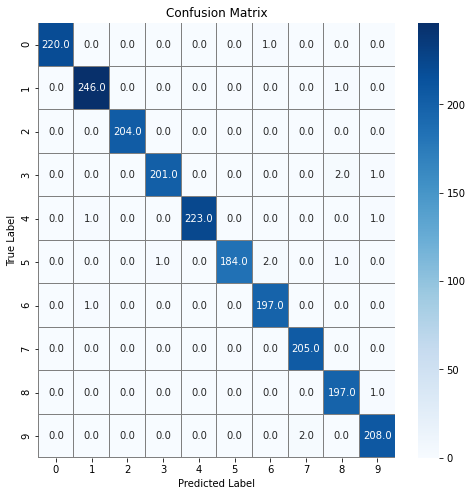

In [11]:
# Predict the probabilities of each class
val_predictions = model.predict(X_val)

# For each training observation, identify the predicted class
val_pred = np.argmax(val_predictions, axis = 1)

# Generate confusion matrix
confusion_mtx = confusion_matrix(y_val, val_pred) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Blues",linecolor="grey", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# We are reasonably happy with the model, with most images being classified correctly

In [12]:
# See accuracy score when tested on cross-validation set
print("The accuracy score is "+str(accuracy_score(y_val,val_pred)))

The accuracy score is 0.9928571428571429


# 6) Generate predictions on test set

In [13]:
# Predict the probabilities of each class
test_predictions = model.predict(X_test)

# For each training observation, identify the predicted class
test_pred = np.argmax(test_predictions, axis = 1)
print(test_pred)

[2 0 9 ... 3 9 2]


In [14]:
submission = pd.DataFrame({'ImageId':np.arange(1,28001),'Label':test_pred})
submission.to_csv('submission.csv', index=False)